# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

**Before starting with this lab, here is a quick reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating).**

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

In [4]:
print(training_data.shape)
print(test_data.shape)

(12343, 3)
(9288, 3)


For later reference, we store the sorted list of party abbreviations.

In [5]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#% matplotlib inline

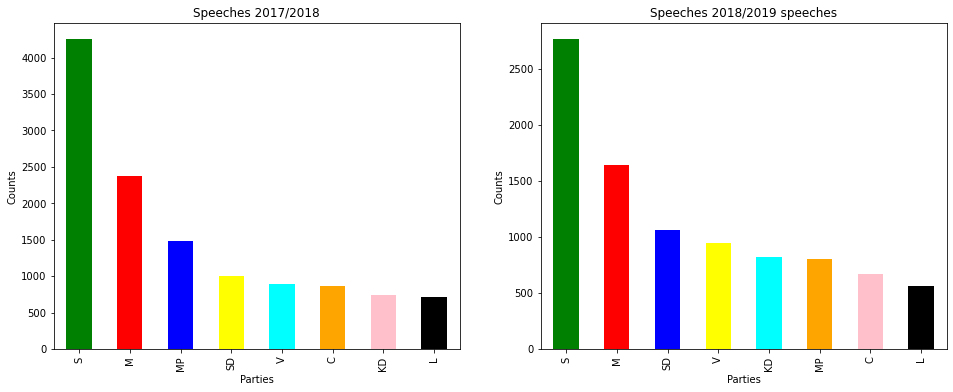

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
training_data['party'].value_counts().plot(kind='bar',color=['green', 'red', 'blue', 'yellow', 'cyan','orange','pink','black'])
plt.xlabel("Parties")
plt.ylabel("Counts")
plt.title("Speeches 2017/2018")

plt.subplot(1,2,2)
test_data['party'].value_counts().plot(kind='bar',color=['green', 'red', 'blue', 'yellow', 'cyan','orange','pink','black'])
plt.xlabel("Parties")
plt.ylabel("Counts")
plt.title("Speeches 2018/2019 speeches")
plt.show()

From this bar plot, the distribution of the classes are imbalanced.where the party S has high number of speeches data compare with the other parties.


The speeches in the year 2017/2018 were mostly given by parties M, S , MP. The other parties seems to give significantly less speeches than these 3.

However in 2018/2019 S,M and SD seems to give the majority of the speeches where the other parties contribute a small portion of the speeches during the campain.

In both the campains the parties M and S have managed to give the majority of the speeches.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

For the implementation of text classification.


vectorizer(countvectorizer)-- matrix document vector --- predictor(MNB)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [9]:
# split the training and test data
X_train = training_data["words"]
X_test  = test_data["words"]
y_train = training_data["party"]
y_test  = test_data["party"]

# pipline the process for text classification
pipe = Pipeline([("count_vectorizer",CountVectorizer()),
                 ("tfidf_transformer",TfidfTransformer()),
                 ("nb_classifier",MultinomialNB())])

# fit the model to the train data
pipe.fit(X_train, y_train)

# predict the train values 
train_pred = pipe.predict(X_train)
print(classification_report(y_train, train_pred,target_names=parties))

C:\Users\Mowniesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mowniesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           C       0.00      0.00      0.00       865
          KD       0.00      0.00      0.00       743
           L       0.00      0.00      0.00       719
           M       0.97      0.01      0.03      2370
          MP       0.00      0.00      0.00      1481
           S       0.35      1.00      0.51      4261
          SD       0.00      0.00      0.00      1010
           V       0.00      0.00      0.00       894

    accuracy                           0.35     12343
   macro avg       0.16      0.13      0.07     12343
weighted avg       0.31      0.35      0.18     12343



C:\Users\Mowniesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# predict the test values
test_pred = pipe.predict(X_test)
print(classification_report(y_test, test_pred, target_names=parties))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.50      0.00      0.00      1644
          MP       0.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       0.00      0.00      0.00      1060
           V       0.00      0.00      0.00       950

    accuracy                           0.30      9288
   macro avg       0.10      0.13      0.06      9288
weighted avg       0.18      0.30      0.14      9288



C:\Users\Mowniesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mowniesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mowniesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Would you have expected the results that you got?

The train accuracy is 35% but the test accuracy is 30%,it is due to the unbalanced distribution of each classes in the training data.To achieve a high accuracy sampling the each classes of data.


## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [11]:
from sklearn.dummy import DummyClassifier

In [12]:
# Dummy classifier model
clf = DummyClassifier(strategy='stratified')
clf.fit(X_train, y_train)

# Predict the train by using dummmy classifier
dummy_train_pred = clf.predict(X_train)
dummy_test_pred  = clf.predict(X_test)

# Evaluate the model with train and test
print("Accuraccy of the training data by  using the dummy classifier {}".format(round(np.mean(y_train == dummy_train_pred)*100,2)))
print("Accuraccy of the test data by  using the dummy classifier {}".format(round(np.mean(y_test == dummy_test_pred)*100,2)))

Accuraccy of the training data by  using the dummy classifier 19.18
Accuraccy of the test data by  using the dummy classifier 17.6


* The Random baseline Dummy classifier is giving low accuraccy for training and test data when compare with the multinomail naive bayes classifier

An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [13]:
# Dummy classifier model
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)

# Predict the train by using dummmy classifier
dummy_train_pred = clf.predict(X_train)
dummy_test_pred  = clf.predict(X_test)

# Evaluate the model with train and test
print("Accuraccy of the training data by  using the dummy classifier {}".format(round(np.mean(y_train == dummy_train_pred)*100,2)))
print("Accuraccy of the test data by  using the dummy classifier {}".format(round(np.mean(y_test == dummy_test_pred)*100,2)))

Accuraccy of the training data by  using the dummy classifier 34.52
Accuraccy of the test data by  using the dummy classifier 29.86


The accuracy of the base line clsssifier using most_frequent strategy is more similar to the naive bayes classifier

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [14]:
from sklearn.utils import resample

min_amount = min(training_data['party'].value_counts())
min_amount

# open a list to segragate a each class values
dflist=[]
for i in parties:
   dflist.append(training_data[training_data["party"]==i])

# sampling function
def nsample(x, n=min_amount):
  new = resample(x, replace = False, n_samples = n)
  return new  

# Apppend the eqaully sampled data of each classes
undersampled_data  = []
for i in dflist:
  undersampled_data.append(nsample(i))

# Final undersampled data
df2 =  pd.concat(undersampled_data)


In [15]:
# split the training and test data
bX_train = df2["words"]
by_train = df2["party"]


# fit the model to the train data
pipe.fit(bX_train, by_train)

# predict the train values 
btrain_pred = pipe.predict(bX_train)
print(classification_report(by_train, btrain_pred,target_names=parties))

# predict the test values
btest_pred = pipe.predict(X_test)
print(classification_report(y_test, btest_pred,target_names=parties))

              precision    recall  f1-score   support

           C       0.94      0.93      0.93       719
          KD       0.85      0.97      0.91       719
           L       0.96      0.95      0.96       719
           M       0.84      0.95      0.89       719
          MP       0.96      0.85      0.90       719
           S       0.99      0.83      0.90       719
          SD       0.95      0.92      0.93       719
           V       0.87      0.93      0.90       719

    accuracy                           0.92      5752
   macro avg       0.92      0.92      0.92      5752
weighted avg       0.92      0.92      0.92      5752

              precision    recall  f1-score   support

           C       0.30      0.40      0.34       671
          KD       0.24      0.43      0.31       821
           L       0.31      0.38      0.34       560
           M       0.37      0.54      0.44      1644
          MP       0.34      0.34      0.34       809
           S       0.83 

* From the accuracy , the model is overfitted. By using the undersampling technique we resampled the data into equal sample,so the accuracy of the test data is 39%.


## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). If you would rather see a visual representation, you can also use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

In [16]:
# Creation of confusion matrix in using sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [17]:
training_data.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


In [18]:
cm = confusion_matrix(y_test,btest_pred)
cm

array([[271,  97,  37, 131,  38,  12,  35,  50],
       [ 71, 355,  33, 221,  33,  17,  37,  54],
       [ 53,  64, 210,  92,  33,   9,  38,  61],
       [137, 255,  91, 890,  59,  28,  90,  94],
       [ 63, 108,  36, 135, 275,  73,  36,  83],
       [172, 357, 139, 556, 292, 779, 176, 302],
       [ 85, 147,  82, 207,  42,  12, 390,  95],
       [ 51, 120,  43, 153,  36,  14,  53, 480]], dtype=int64)

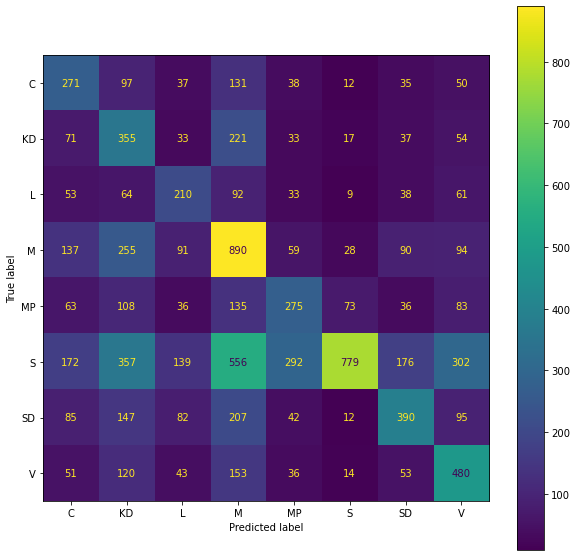

In [19]:
fig,ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=parties)
disp.plot(ax=ax)
plt.show()

Take a minute to reflect on whether your results make sense.


* The results make sense , the confusion matrix Diagonal elemets seems to be in the high level with slight deviations with the off diagonals of S. However most of the parties have been classified correctly with slight outliers in certain parties. This compared to Problem is far more better way of classification.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
Gpipe = Pipeline([('count_vect',CountVectorizer()),
                ('tfidf_transformer',TfidfTransformer()),
                ('nbClassifier',MultinomialNB())])


parameters = {
    'count_vect__binary': [True, False],
    'count_vect__ngram_range': [(1, 1), (1, 2)],
    'nbClassifier__alpha': (1, 0.1),
}

grid_search = GridSearchCV(Gpipe, parameters, cv=5)

In [22]:
 # find the best parameters for both the feature extraction and the
 # classifier
clf = grid_search.fit(bX_train, by_train)
print(grid_search.best_params_)

{'count_vect__binary': True, 'count_vect__ngram_range': (1, 2), 'nbClassifier__alpha': 0.1}


In [23]:
cv_test_pred = clf.predict(X_test)
print(classification_report(y_test,cv_test_pred,target_names=parties))

              precision    recall  f1-score   support

           C       0.33      0.45      0.38       671
          KD       0.30      0.43      0.35       821
           L       0.32      0.40      0.36       560
           M       0.43      0.50      0.46      1644
          MP       0.36      0.42      0.39       809
           S       0.80      0.41      0.54      2773
          SD       0.52      0.44      0.48      1060
           V       0.44      0.61      0.51       950

    accuracy                           0.46      9288
   macro avg       0.44      0.46      0.43      9288
weighted avg       0.52      0.46      0.47      9288



## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
svmpipe = Pipeline([('count_vect',CountVectorizer()),
                ('tfidf_transformer',TfidfTransformer()),
                ('svm',SGDClassifier())])

parameter = {
    'count_vect__binary': [True, False],
    'count_vect__ngram_range': [(1, 1), (1, 2)],
    "svm__alpha": (1,0.1)}

grid_s1 = GridSearchCV(svmpipe, parameter, cv=5)

In [26]:
clf1 = grid_s1.fit(bX_train,by_train)
print(grid_s1.best_params_)

{'count_vect__binary': False, 'count_vect__ngram_range': (1, 1), 'svm__alpha': 0.1}


In [27]:
svm_test_pred = clf1.predict(X_test)
print(classification_report(y_test,svm_test_pred,target_names=parties))

              precision    recall  f1-score   support

           C       0.40      0.23      0.30       671
          KD       0.12      0.64      0.20       821
           L       0.38      0.13      0.20       560
           M       0.54      0.08      0.14      1644
          MP       0.22      0.27      0.24       809
           S       0.71      0.30      0.42      2773
          SD       0.34      0.36      0.35      1060
           V       0.37      0.29      0.33       950

    accuracy                           0.28      9288
   macro avg       0.39      0.29      0.27      9288
weighted avg       0.47      0.28      0.30      9288



## Reflection questions

The following reflection questions are questions that you could be asked in the oral exam. Try to answer each of them in the form of a short text and enter it in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 2.1:** Summarise the results of your experiments for Problem&nbsp;2. Are your results ‘good’ or ‘bad’? How do you determine that?

**ANS :** The results from problem 2 are bad. This is because of the unbalanced training data. This makes it     harder for the Naive Bayes classfier to look for the underlying class for the unbalanced classes in real time.


**RQ 2.2:** Summarise the results of your experiments for Problem&nbsp;4. Would you think that your results are typical even for other classification tasks? How would *oversampling* have looked like for this task? When would you use undersampling, when oversampling?

**ANS :** The results from problem 4 looks promising compared to problem 2. The indivudual F-1 scores of classes looks good compared to problme 2 where the unbalaced classes were not been classified and hence with a F-1 score of zero. The results seem typical for any other classification task. 

if we had oversampled the data , Then we might slighty get a better training accuracy but, might get bad test scores since random addition of observations to unbalanced classes might lead to over fitting.



**RQ 2.3:** Which model performed best in your experiments for Problem&nbsp;6? Why is it important to do a hyperparameter search before drawing conclusions about the performance of a model? Why is it often not done, anyway? Why should you never tune hyperparameters on the test set?


**ANS :** In problem 6 , Multinomial Naive Bayes seems to perform better. The performence of a model often depends upon its parameters. If the parameter values are set to an arbitary value it might give us completely differernt results. Hence it is important to find the best hyperparameters to fit the model in order to get good resutls.
 
Hyper parameter tuning is often neglected becuase the user trusts the default hyperparamaters of the model. 

Hyperparamreter tuning is often done with a validation set or by doing cross validation and not with test dataset because if we use the test dataset , This gives an oppourtunity for the model to actually see and learn from this dataset , hence it adds a bias while testing the data for accuracy.






*TODO: Enter your answers here*

**Congratulations on finishing L2! 👍**